# Convolution 

This notebook contains applications of convolutions, for three example tasks:
* Edge Detection
* Blurring
* Sharpening

### References

- [https://en.wikipedia.org/wiki/Demosaicing](https://en.wikipedia.org/wiki/Demosaicing)
- [https://en.wikipedia.org/wiki/Bayer_filter](https://en.wikipedia.org/wiki/Bayer_filter)
- [http://nagykrisztian.com/store/hirakawa.pdf](http://nagykrisztian.com/store/hirakawa.pdf)
- [https://ui.adsabs.harvard.edu/abs/2006JEI....15a3003C/abstract](https://ui.adsabs.harvard.edu/abs/2006JEI....15a3003C/abstract)
- [https://paperswithcode.com/task/demosaicking](https://paperswithcode.com/task/demosaicking)
- [https://www.semanticscholar.org/paper/Color-filter-array-recovery-using-a-threshold-based-Chang-Cheung/361502aad08b474fa7a399532608f855651a9cc4](https://www.semanticscholar.org/paper/Color-filter-array-recovery-using-a-threshold-based-Chang-Cheung/361502aad08b474fa7a399532608f855651a9cc4)
- [https://en.wikipedia.org/wiki/Sobel_operator](https://en.wikipedia.org/wiki/Sobel_operator)
- [https://pl.wikipedia.org/wiki/Sobel](https://pl.wikipedia.org/wiki/Sobel)
- [https://pl.wikipedia.org/wiki/Prewitt](https://pl.wikipedia.org/wiki/Prewitt)
- [https://en.wikipedia.org/wiki/Kernel_(image_processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))
- [https://blog.demofox.org/2022/02/26/image-sharpening-convolution-kernels/](https://blog.demofox.org/2022/02/26/image-sharpening-convolution-kernels/)

### Setup

In [1]:
import numpy as np
from skimage import io
from skimage import transform

from src.conv import convolve_with_stride
from src.kernels import gaussian_blur_kernel

# Edge Detection

Edges in computer vision are usually computed by computing image derivatives along given axis or by computings its gradient. Both those operations can be computed using convolution.

In [2]:
image = io.imread(r"../../data/circle.jpg")
image = image[:, :, :3]  # ignore last dimension if RGBA image is used
image = transform.resize(image, output_shape=(256, 256, 3))  # make image large to show edges easily 
image.shape

(256, 256, 3)

### Filters

Kernels used for edge detection include:
* Sobel filters
* Laplace filter
* Prewitt operator
* Sobel Feldman Operator
* Scharr Operator
* Robert's Cross Operator

In [3]:
laplace_filter = np.array(
    [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0]]
)

laplace_filter

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


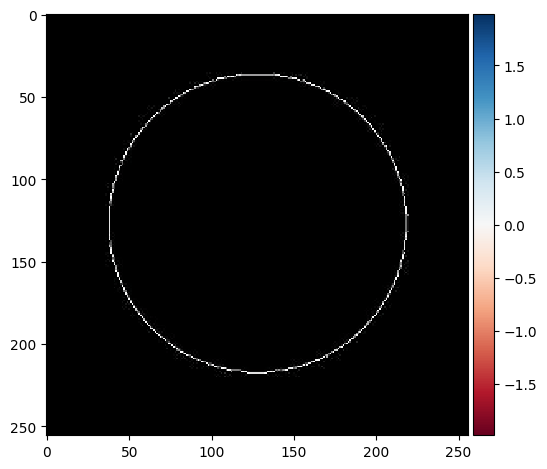

In [4]:
filtered_image = convolve_with_stride(image, laplace_filter)
_ = io.imshow(filtered_image)

# Blur

Blurring an image can be done by computing local mean, where locality is defined by the kernel size. This should have a blurring visual effect, larger for larger kernel sizes.

In [5]:
image = io.imread(r"../../data/panda.jpg")  # use different image for blurring
image = image[:, :, :3]  # ignore last dimension if RGBA image is used
image = transform.resize(image, output_shape=(512, 512, 3))  # make image large to show edges easily 
image.shape

(512, 512, 3)

In [6]:
def get_blur_kernel(size: int):
    return np.ones([size, size]) / (size ** 2)

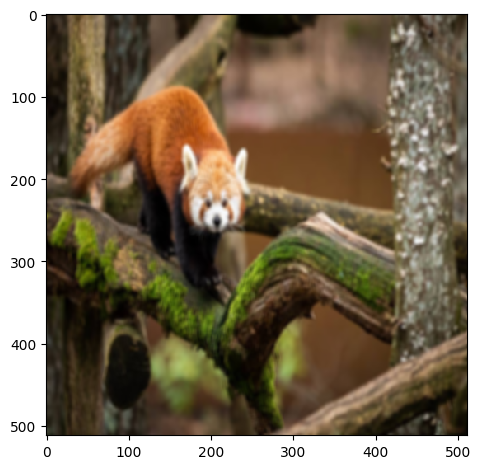

In [7]:
blur_kernel = get_blur_kernel(size=5)
filtered_image = convolve_with_stride(image, blur_kernel)
_ = io.imshow(filtered_image)

### Gaussian Blur

Gaussian blur is similar to mean blurring, but the kernel is weighted using normal distribution.

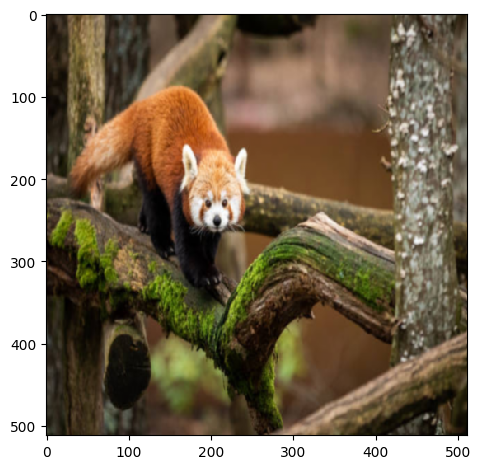

In [8]:
blur_kernel = gaussian_blur_kernel(size=3, sigma=1)
filtered_image = convolve_with_stride(image, blur_kernel)
_ = io.imshow(filtered_image)